To be done:
- DONE (magari può essere fatto meglio, ma non ho voglia e non saprei come) Commento grafici punto 4
- DONE (nel senso che era stupido:)Commento su perchè non sampliamo direttamente dalla posterior nel punto 3 (non sono sicura su questo, samplare dalla posterior sarebbe finalizzato ad utilizzare un diverso stimatore bayesiano (la media della posterior) ho paura che aggiungendo anche questo si vada un po' fuori strada)
- DONE 
Tutti gli esempi - TUTTI.. ne ho guardati un tot - usano la sommatoria nella likelihood solo per $i<j$ e per i termini uguali considerano solo l'influenza di un campo esterno... ce ne freghiamo altamente o facciamo un commento del tipo "a parer nostro l'esponente della likelihood sarebbe dovuto essere ..... , ma ci atteniamo in ogni caso al testo dell'esercizio"?

- DONE Especially per il mio amico matematico, possiamo dire che la log-likelihood e il log della posterior sono funzioni concave? Perchè in teoria è una cosa importante per poter usare il metodo del gradiente.
(dovrebbe esserlo)

- DONE Valutare la bontà del punto 5, non so bene se quel che ho fatto va bene :()

The Log-likelihood distribution is CONVEX because it is the composition of a linear (therefore convex) function $\R^{2(N+q)}\rightarrow \R : \underline{x}\mapsto \sum_i x_i$ with a non decreasing convex function $\R\rightarrow\R : x\mapsto e^x$ 

The Prior DOES NOT LOOK LIKE A CONCAVE FUNCTION. I do not find an easy counterexample but if it is necessary I can work it out in 15 minutes I hope. 

We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where the exponent represent (minus) the "energy" of the model and the partition function

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

is generally intractable as it requires to sum over $q^M$ states of the variables.

<font color = "yellow">Since we are driven to interpret the exponent of the likelihood function as a measure of the energy of the model, we actually expect that its sum should have been only over the variables $i \le j$ for $i,j=1,\dots,N$. In fact if we consider all possible combination of the pairs $(i,j)$, we end up summing twice the interaction between $i$ and $j$ for all $i,j$ (because the interaction $(i,j)$ coincides with $(j,i)$). We also expected no interaction of a variable with itself, nevertheless we may interpret these as due to the action of an external field. Nevertheless we stick to the given definition (mainly because the data have probabibly have been generated in this framework).</font>

Coming back to our task, our purpose is to infer the coupling matrix $J$. To do so we should decide which estimator will be the object of our inference. Probably the most natural one - and hence our first choice, is the maximum likelihood estimator (MLE). In a regular model, it is generally found has the value of the parameter of interest that solves the first order conditions 

$$\frac{\partial \mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)}{\partial J_{i,j}(a,b)} = 0$$

where

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

is the likelihood distribution of our sampling model.

In general it is useful to compute the log-likelihood divided by $M$ and then its derivative with respect to each parameter $J_{ij}(a,b)$ (note indeed that this trasformation does not affect the monotonicity of the likelihood and hence the coordinates of the maximum).

We obtain:

$$\mathcal{l}\left( J ; \{x^{(m)} \}_{m=1}^{M} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_m J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

and then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Now, solving directly the moment-matching conditions

$$\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)}  = 0$$

is a highly non-trivial numerical task, except for very peculiar forms of the coupling matrix, due to the difficulty in computing averages over the model distribution. Instead we rely on a flexible numerical method, known under the name of Boltzmann machine learning method, that ultimately allow us to iteratively update $J$ using a gradient ascend method.

Note that the gradient ascend method can be performed thanks to the fact that the log-likelihood is a concave function, hence it has only one maximum and the gradient ascend method will numerically compute the MLE of $J$.

Now, in order to design the Boltzmann machine learing scheme, it is crucial to be able to evaluate the gradient of the log-likelihood, whose explicit formula has already been computed above. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling. Then our iterative update of $J$ will be performed as:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

where $\lambda$ is an adequately chosen learning rate.

The intuition underlying this update rule is that, if for example $< \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)}$ is larger than the corresponding value for the data, the value of $J$ should be decreased to match
these two moments.

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$) and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

$$\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)=\sum_{k}J_{ki}(x_k^n,x_i^n)-\sum_{k}J_{ki}(x_k,x_i)+\sum_{j}J_{ij}(x_i^n,x_j^n)-\sum_{j}J_{ij}(x_i,x_j)=$$
$$2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally assuming $J_{jj}=0 \,\forall j$ we get:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence, when the maximum value of the gradient is smaller than a certain threshold.

Before proceeding with the actual code we make some further remarks.

As the core of the Boltzmann machine learning scheme corresponds to a gradient ascent dynamics for the log-likelihood, convergence towards the maximum is guaranteed, provided $\lambda$ are diminished and eventually sent to zero to gently stop in the maximum. However, Boltzmann machine learning suffers from some drawbacks.

First, as the learning dynamics is formulated in a very high-dimensional space, the log-likelihood could be extremely steep along some directions and very flat along others. Thus, a single learning rate $\lambda$ for the couplings could be either too large, leading to overshooting along the steeper directions, or too small, yielding no parameter updates along the flat directions.

This issue could in principle be solved with second-order methods, such as a generalisation of the Newton-Raphson method. However estimating the curvature matrix is quite complex and time-demanding in high dimensions.

Second, Boltzmann machine learning may require massive Monte Carlo sampling, because the moments should be computed at each update step. This may arise issues since, in each Monte Carlo simulation, one can not be sure that equilibration has been realised and that the moment are correctly estimated.

In [2]:
using Random

Random.seed!(9)

TaskLocalRNG()

In [3]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

metropolis_ising (generic function with 1 method)

In [4]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    if M>size(data, 1)
        print("Too large M")
    else
        sij = Array{Matrix{Float64}}(undef, N, N) 
        for i in eachindex(sij)
            sij[i] = zeros(Float64, q, q)
        end

        for i in 1:N, j in 1:N
            for m in 1:M
                sij[i,j][data[m,i], data[m,j]] += 1
            end
            sij[i,j] ./= M
            #sij[j,i] .= sij[i,j]'
        end

        return sij  # this gives us the sample frequencies
    end
end

compute_stats (generic function with 1 method)

In [5]:
using CSV
using DataFrames

df = DataFrame(CSV.File("data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)
#"C:\\Users\\lucia\\OneDrive\\Desktop\\Documenti\\Collegio Carlo Alberto\\Models and Algorithms\\data.dat"

2000×5 Matrix{Int64}:
 2  4  1  1  4
 2  1  1  2  2
 4  1  4  4  3
 1  4  3  1  2
 4  2  2  2  3
 3  3  2  2  3
 4  1  3  4  2
 2  4  3  4  1
 4  1  3  4  3
 2  4  2  4  4
 4  1  2  2  4
 2  3  3  1  2
 4  2  4  4  3
 ⋮           
 4  1  1  2  3
 4  3  3  4  3
 2  3  4  1  3
 2  4  4  1  3
 2  1  1  4  3
 4  2  1  1  4
 2  4  3  1  4
 1  4  4  4  1
 4  1  1  2  3
 3  4  3  2  4
 3  3  1  4  4
 3  4  2  1  4

In [6]:
M = size(xdata, 1)
sij = compute_stats(xdata, M)

5×5 Matrix{Matrix{Float64}}:
 [0.2555 0.0 0.0 0.0; 0.0 0.2545 0.0 0.0; 0.0 0.0 0.2345 0.0; 0.0 0.0 0.0 0.2555]                              …  [0.074 0.0605 0.0575 0.0635; 0.067 0.07 0.0535 0.064; 0.055 0.0565 0.068 0.055; 0.0655 0.057 0.063 0.07]
 [0.03 0.0735 0.056 0.083; 0.072 0.0315 0.072 0.073; 0.0855 0.069 0.032 0.0695; 0.068 0.0805 0.0745 0.03]         [0.067 0.06 0.056 0.0595; 0.064 0.0605 0.0595 0.0645; 0.068 0.063 0.0635 0.0615; 0.0625 0.0605 0.063 0.067]
 [0.025 0.075 0.0615 0.086; 0.0755 0.03 0.074 0.071; 0.077 0.0755 0.0275 0.071; 0.078 0.074 0.0715 0.0275]        [0.023 0.078 0.0655 0.081; 0.078 0.0255 0.0745 0.0725; 0.081 0.0695 0.0295 0.071; 0.0795 0.071 0.0725 0.028]
 [0.069 0.053 0.0575 0.0595; 0.0585 0.073 0.0595 0.0655; 0.0645 0.0685 0.0555 0.05; 0.0635 0.06 0.062 0.0805]     [0.025 0.0685 0.068 0.0775; 0.0855 0.0275 0.07 0.0735; 0.0755 0.067 0.023 0.073; 0.0755 0.081 0.081 0.0285]
 [0.074 0.067 0.055 0.0655; 0.0605 0.07 0.0565 0.057; 0.0575 0.0535 0.068 0.063; 0.06

In [7]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        #ε = maximum.([abs.(Δsij[i]) for i in eachindex(Δsij)])     # to check whether we have reached convergence or not
        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning (generic function with 1 method)

In [8]:
N = 5
q = 4

J_True = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_True)
    J_True[i] = zeros(Float64, q, q)
end

J_True, sij_model, ε, xall = boltzmann_learning(sij, J_True, λ = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 50 	 Time: 0:00:52


([[0.005150000000000127 0.0 0.0 0.0; 0.0 0.01585000000000007 0.0 0.0; 0.0 0.0 -0.01655000000000079 0.0; 0.0 0.0 0.0 -0.004449999999999919] [-0.3084000000000004 0.08779999999999963 0.18495000000000025 0.040800000000000274; 0.10354999999999981 -0.30245000000000033 0.06550000000000022 0.14924999999999997; 0.02140000000000002 0.12219999999999959 -0.2988000000000003 0.13864999999999997; 0.16770000000000013 0.09989999999999963 0.04895000000000015 -0.32099999999999973] … [0.028900000000000172 -0.039149999999999865 0.04685000000000009 -0.031450000000000033; -0.04950000000000011 0.03589999999999972 0.05705000000000036 -0.027600000000000128; -0.018849999999999898 0.029349999999999828 -0.036049999999999964 0.00899999999999997; 0.018749999999999854 -0.007449999999999897 -0.08039999999999987 0.06465000000000011] [0.013399999999999778 -0.003350000000000136 -0.023449999999999936 0.018549999999999983; 0.03570000000000014 0.02460000000000036 -0.04785000000000006 0.003400000000000043; -0.054699999999999

Up to now we have made inference on the coupling matrix J. 

The next step consists in capturing the topology of the network of pairwise couplings. Since the coupling matrices J are not straightforward to interpret, we rely on a different tool, the Frobenius norm of each coupling matrix $J_{ij}$.

The underlying idea is the following:
to assess the topology, we need to map each $q × q$ coupling matrix $J_{ij}$ onto a scalar quantity measuring the coupling strength between the two variables i and j.

$$F_{ij} = \sqrt{\sum_{a,b}J_{ij}(a,b)^2}$$

Once all the Frobenius norms are computed, the "interacting" sites can be inferred as those site pairs with the strongest couplings.

In [26]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

Frobenius (generic function with 1 method)

In [27]:
Fij = Frobenius(J_True)

5×5 Matrix{Float64}:
 0.023905  0.731363   0.839181   0.164182  0.117663
 0.731363  0.0190582  0.128536   0.811457  0.0992429
 0.839181  0.128536   0.0184701  0.100371  0.870736
 0.164182  0.811457   0.100371   0.033867  0.913384
 0.117663  0.0992429  0.870736   0.913384  0.0220174

In [46]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

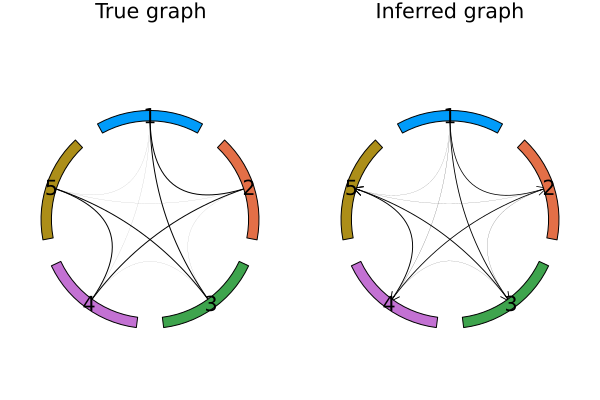

In [47]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


The inferred graph clearly shows that the true couplings are correctly inferred by the Boltzmann machine.

In [48]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

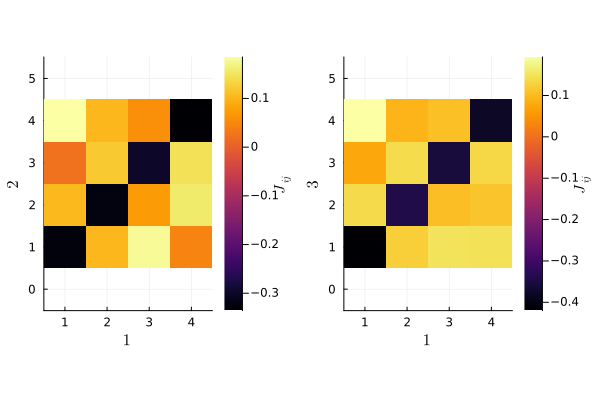

In [49]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J_True[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

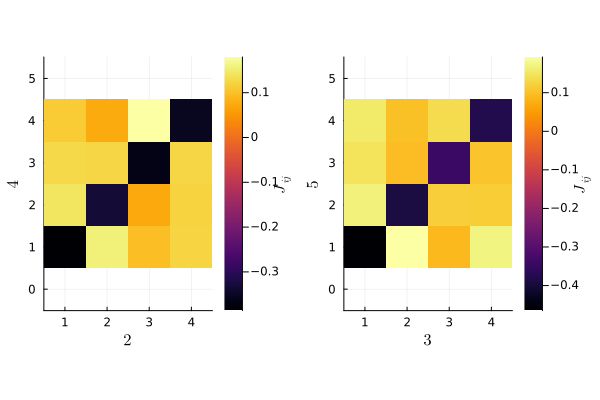

In [50]:
plot(p[3], p[4], aspect_ratio = 1)

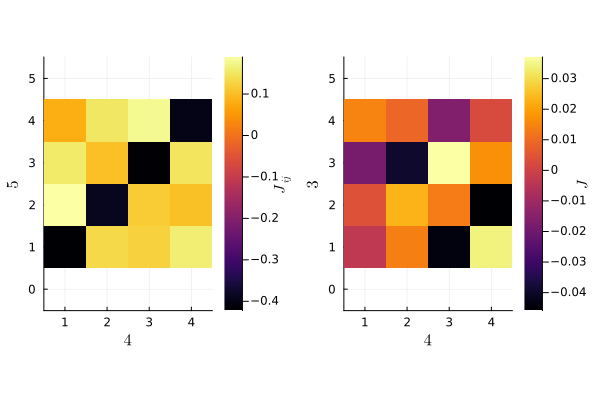

In [51]:
uncorrelated = heatmap(J_True[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)

It is interesting to perform again the estimation of $J$ using a different, Bayesian, approach and then compare the results.

The underlying intuition is the following:

The above "frequentist" Boltzmann machine is aimed at returning a point estimate of J as a result of a maximization problem. In particular, it performs a gradient ascend method in order to maximize the likelihood function and thus it finds numerically the maximum likelihood estimator (MLE) of J, i.e. the value of J for which, under the assumed statistical model, the observed data have the highest joint probability. To better understand its meaning, it is useful to recall that everytime we perform a ML estimation, we are assuming (as in all frequentist statistical inference procedures) a true generating mechanism, that is to say the existence of a true, but unknown, value of the parameter that has generated the data and that we aim to unveil. Thanks to their straightforward interpretation and their "good" properties, MLEs are often used to approximate the true parameter and ML estimation has become a dominant tool to make statistical inference.

What we present next requires the switch from a frequentist to a Bayesian point of view.

Bayesian statisticians consider the parameter as an actual random variable which, therfore, has its own probability distribution. Loosely speaking, in Bayesian statistics a probability expresses a degree of belief: before performing the experiment, the prior distribution of the parameter encodes the a-priori beliefs about the parameter, i.e. what we expect, for any kind of reason, before observing the data. After collecting the data, Bayes theorem is used to incorporate these information in the prior distribution. The result is the so-called posterior distribution of the considered parameter and it embodies our updated beliefs about the parameter, once evidence is observed. The posterior distribution contains our full knowledge about the parameter.

Mathematically, given a prior probability $P(\theta)$ and a likelihood function $P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right)$, the posterior distribution of $\theta$ is, up to a proportionality constant, obtained as

$$P\left(\theta | \,\left\{x^{(m)}\right\}_{i=1}^M\right) \quad \propto \quad P(\theta) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right) $$

The posterior distribution is at the heart of Bayesian inference. Indeed, depending on the situations, meaningful statistics of the parameter can be derived from it and used as estimates of the parameter itself. To be more precise, Bayesian estimation methods are based on the minimization of the posterior risk with respect to a specified loss function. For instance, for a quadratic loss, an absolute error loss or the 0-1 loss function, the Bayes estimator is given, respectively, by the posterior mean, median and mode.

To be more complete, let us mention the fact that dealing with the 0-1 loss function is actually trickier. Everything works fine in the discrete case, whereas in the continuous one it needs to be expressed in terms of the Dirac delta distribution (and thus it would not be properly a function anymore).

In the particular situation we are considering, we aim at modifying the Boltzmann machine so that it would not return the MLE of our parameter $J$, but an estimate that "exploits" its posterior distribution. As we have shortly argued above, there is not a unique choice for the estimator to be used, nevertheless the maximum a posteriori (MAP) estimate appeared to us as the most natural one.

The MAP estimate is, by definition, the value that maximizes the posterior distribution (its mode):
$$J_{MAP} = \argmax_{J} P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)$$

Its interpretation is clear: it corresponds to the "point" in the parameter space with the "highest probability of occurence", given both the observed data and prior information.

It is also interesting (and easy to observe) that if the prior distribution over the parameter is chosen to be uniform, then the MAP estimate actually coincides with the MLE. Generally a uniform prior distribution is interpreted as an uninformative prior distribution, meaning that it is used when no prior information is available or to prevent our prior beliefs from affecting the results. As a consequence the posterior distribution will be totally specified by the likelihood function and the MLE will be retrieved. This provides further support to our estimation choice: the previous estimation procedure intrinsically emerges as a special case (the one corresponding to a uniform prior distribution) of the method we are going to present.

As a final remark, we can say that the MAP estimate can be considered a "Bayesian generalization of the MLE", since it corresponds to the mode of an augmented optimization objective which incorporates the prior distribution (that quantifies the a-priori additional information available).

Given everything we have said, let us design the new Boltzmann machine learning scheme. Exactly as before, we use an iterative update of $J$ based on a gradient ascend method, hence we need to compute the gradient of the objective function we want to maximizes:

$$\begin{aligned}
P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right) = \quad \propto \quad &P(J) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,J \right)\\ & e^{-\lambda \sum_{a,b,i,j}\lvert J_{ij}(a,b) \rvert} \, \prod_m\frac{1}{Z}e^{\sum_{i,j}\sum_{a,b}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}
\end{aligned}$$

(note that it is concave so it has only one maximum and the gradient ascend method can be performed)

It is convenient to take its logarithm and divide everything by M:
$$ (\star) \quad \frac{1}{M} log\left(P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)\right) = - \frac{\lambda}{M}\sum_{a,b,i,j} \lvert J_{ij}(a,b) \rvert + {\frac{1}{M}} \sum_{i,j}\sum_{a,b}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

We can now derive the gradient:
\begin{align}
\frac{\partial (\star) }{\partial J_{i,j}(a,b)} & = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

The Boltzmann machine learning scheme can therefore being updated as follows:
$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) \, {-\frac{\lambda*\lambda_{J}}{M}} sign\left( J_{i,j}(a,b) \right) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

As a matter of notation, we will denote the parameter $\lambda$ of the prior distribution as $\lambda_{prior}$.

In [52]:
using ProgressMeter
using Distributions

function boltzmann_learning_MAP(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, λ_prior::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij  .- sij_model 
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        for i in 1:N, j in 1:N
            J[i,j] = J[i,j] - (λ_prior*λ)/dmax .* sign.(J[i,j])
        end
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning_MAP (generic function with 1 method)

In [ ]:
N = 5
q = 4

J_MAP = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_MAP)
    J_MAP[i] = zeros(Float64, q, q)
end

J_MAP, sij_model, ε, xall = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = 500, εmax = 1e-2)

As before, we detect the "interacting" variables by means of the Frobenius norm of each coupling matrix.

In [54]:
Fij_MAP = Frobenius(J_MAP)

5×5 Matrix{Float64}:
 0.0212222  0.732297    0.822849   0.150509   0.115371
 0.732297   0.00882037  0.111507   0.803874   0.0940685
 0.822849   0.111507    0.0114765  0.107406   0.868608
 0.150509   0.803874    0.107406   0.0254879  0.89783
 0.115371   0.0940685   0.868608   0.89783    0.0237526

It is easy to verify that the just computed coupling pattern fit the previous one. Indeed, even if the entities of the norms may be differ a bit, the detected contacting (or interacting) site pairs correspond exactly.

Note that this is also important to target the coherence of our results: at least nothing seems to suggest that our procedures are wrong.

Before continuing the comparison of the two strategies - the frequentist and the Bayesian one - we target rapidly the choice of the parameter $\lambda_{prior}$ of the prior distribution. Loosely speaking, as the sample size increases, the likelihood becomes more and more relevant in determining the posterior distribution, however an inappropriate prior distribution may dramatically slow down the convergence or even lead to inconsistent results. Therefore, in real-life applications, it is preferable to determine it by means of cross-validation.

To adress our particular case it may be useful to try to understand the meaning of the prior distribution.

We can eaily recognize, in its exponential, the L1-norm of the parameter coupling matrix $J$. Now, since our aim is to maximize the posterior distribution, the chosen $L_1$ prior imposes a sparse solution by adding a "penalty" that increases quickly near the origin, with a linear slope. In other words, because the prior is an exponentially
decaying function, in the course of inference it favors matrices $J$ with small $L_1-norms$ and penalises $J$'s with large $L_1-norms$, . More generally, this prior may be seen as a regulariser: it penalises large parameter values that may arise through maximization of the log-likelihood.

Actually, something more interesting can be said: if we consider the whole class of $L_p-norm$ priors

$$p(J) = e^{-\lambda \, \lvert\lvert J \rvert\rvert_p} $$

it can be proven that the $L_1$ prior is the only one that favours sparsity while preserving the concavity of the log-likelihood into the log-posterior.

In our case, we have been explicitely asked to choose a small $\lambda_{prior}$ in the prior distribution. Heuristically, we may understand this request by noticing that if $\lambda_{prior}$ is large, then the prior distribution returns values very close to zero (for every J whose norm 1 is different from zero). This may result in a posterior distribution that is "too flat" and depends only poorly on the likelihood. In other words we can say that the model is overconstrained by the prior, and has not enough power to account for the true distribution of the data.

Conversely, choosing a $\lambda_{prior}$ that is too small makes almost irrelevant the presence of the prior distribution (indeed in the limit $\lambda_{prior} \to 0$ the prior distribution becomes closer and closer to a uniform one). As a consequence we may say that, for low $\lambda_{prior}$ values, the inferred model overfits the details of the data set and this is actually one of the things aimed to avoid using a Bayesian framework.

For these reasons we decided to choose a "good compromise" between these extreme behaviors: $\lambda_{prior} = 0.1$ appears to us as a good choice.

Below we tried to re-run the *boltzmann_learning_MAP* function for different values of $\lambda_{prior}$.

In [ ]:
λ_prior = 0.1 #10.0, 1.0, 0.01
q = 4
fill!(J_MAP, zeros(Float64, q,q))
J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = λ_prior, Tmax = 500, εmax = 1e-2)

Fij_MAP = Frobenius(J_MAP)

As expected for large values of $\lambda_{prior}$, the Boltzmann machine learning scheme does not seem to work properly. Indeed, by looking at the corresponding Frobenius norms, we can observe that the entries of the inferred coupling matrix (and so their Frobenius norms) are eccesively drawn toward zero. This suits perfectly our previus interpretation: for large values of $\lambda_{prior}$ the prior is over-weighted and, consequently, the prior is over-constrained. This lead to a very sparse coupling matrix. Nevertheless we are still able to detect the strongest couplings.

For what concerns small - but still sufficiently different from zero - values of $\lambda_{prior}$ (such as $\lambda_{prior} = 0.5, \, 0.1, \, 0.01$) we found consistency with the previous method.

This is important since it gives us a further check of the previous results.

We now proceed with our comparison: our current aim is to tackle the efficiency of the two approaches.

More precisely, since we are mainly interested in detecting the "interacting variables" - i.e. the pairs of variables that score high in the Frobenius norm matrix - we appreciate the efficiency of the methods by looking at "how strong the couplings of the interacting variables are". In addition, it is also interesting to check wheter the "gap" between the Frobenius norms of the most coupled and less coupled variables remains sufficiently large.

To do so we re-run the Boltzmann machine algorithms letting the number of iterations performed by the Boltzmann learning schemas vary:

In [ ]:
Tmax_range = [100, 500, 1000, 2500, 5000]
Fij_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))
Fij_MAP_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))

for (i, Tmax) in enumerate(Tmax_range)
    fill!(J, zeros(Float64, q,q))
    fill!(J_MAP, zeros(Float64, q,q))

    J, _ = boltzmann_learning(sij, J, λ = 0.1, Tmax = Tmax, εmax = 1e-2)
    J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = Tmax, εmax = 1e-2)

    Fij_Tmax[i] = Frobenius(J)
    Fij_MAP_Tmax[i] = Frobenius(J_MAP)   
end

In [57]:
print("Tmax = ", Tmax_range[1])

display(Fij_Tmax[1])
display(Fij_MAP_Tmax[1])

5×5 Matrix{Float64}:
 0.0262833  0.467308   0.503552   0.144584   0.101611
 0.467308   0.0147931  0.095141   0.481769   0.0514268
 0.503552   0.095141   0.0120293  0.0797579  0.503027
 0.144584   0.481769   0.0797579  0.0355794  0.510477
 0.101611   0.0514268  0.503027   0.510477   0.0292876

5×5 Matrix{Float64}:
 0.0142781  0.448682    0.491766   0.132246   0.101413
 0.448682   0.00832744  0.0906137  0.477727   0.0524773
 0.491766   0.0906137   0.0152049  0.0748118  0.497959
 0.132246   0.477727    0.0748118  0.0309076  0.526718
 0.101413   0.0524773   0.497959   0.526718   0.0211318

Tmax = 100

In [58]:
print("Tmax = ", Tmax_range[2])

display(Fij_Tmax[2])
display(Fij_MAP_Tmax[2])

5×5 Matrix{Float64}:
 0.0296906  0.738293   0.842842   0.164658  0.115702
 0.738293   0.0191096  0.142016   0.804085  0.10709
 0.842842   0.142016   0.0155905  0.118     0.870618
 0.164658   0.804085   0.118      0.031347  0.908474
 0.115702   0.10709    0.870618   0.908474  0.0179188

5×5 Matrix{Float64}:
 0.0154894  0.71772    0.823176   0.157649  0.117484
 0.71772    0.0197235  0.116292   0.791354  0.101041
 0.823176   0.116292   0.0138287  0.100846  0.875747
 0.157649   0.791354   0.100846   0.021763  0.893189
 0.117484   0.101041   0.875747   0.893189  0.00743092

Tmax = 500

In [59]:
print("Tmax = ", Tmax_range[3])

display(Fij_Tmax[3])
display(Fij_MAP_Tmax[3])

5×5 Matrix{Float64}:
 0.0292063  0.753159   0.877594  0.163591   0.109242
 0.753159   0.0183901  0.130877  0.844294   0.128028
 0.877594   0.130877   0.023702  0.114053   0.920805
 0.163591   0.844294   0.114053  0.0353089  0.947203
 0.109242   0.128028   0.920805  0.947203   0.0184771

5×5 Matrix{Float64}:
 0.0111636  0.747938   0.852504    0.158068   0.0994315
 0.747938   0.0157721  0.126626    0.830848   0.117069
 0.852504   0.126626   0.00632381  0.105652   0.90373
 0.158068   0.830848   0.105652    0.0216182  0.939996
 0.0994315  0.117069   0.90373     0.939996   0.0132862

Tmax = 1000

In [60]:
print("Tmax = ", Tmax_range[4])

display(Fij_Tmax[4])
display(Fij_MAP_Tmax[4])

5×5 Matrix{Float64}:
 0.0182288  0.763144   0.863665   0.161119   0.126884
 0.763144   0.0156989  0.135848   0.839129   0.12563
 0.863665   0.135848   0.0302917  0.123798   0.921785
 0.161119   0.839129   0.123798   0.0252392  0.952874
 0.126884   0.12563    0.921785   0.952874   0.0111591

5×5 Matrix{Float64}:
 0.00236804  0.741254   0.869918    0.164745    0.121876
 0.741254    0.0116952  0.139371    0.826066    0.110724
 0.869918    0.139371   0.00936061  0.100715    0.904919
 0.164745    0.826066   0.100715    0.00786383  0.942159
 0.121876    0.110724   0.904919    0.942159    0.00703041

Tmax = 2500

In [61]:
print("Tmax = ", Tmax_range[5])

display(Fij_Tmax[5])
display(Fij_MAP_Tmax[5])

5×5 Matrix{Float64}:
 0.0174508  0.769924  0.884852   0.158334   0.113151
 0.769924   0.011037  0.136796   0.829767   0.135134
 0.884852   0.136796  0.0177292  0.116625   0.917358
 0.158334   0.829767  0.116625   0.0318888  0.953562
 0.113151   0.135134  0.917358   0.953562   0.0184853

5×5 Matrix{Float64}:
 0.00536108  0.768841    0.892812    0.162252   0.117318
 0.768841    0.00934395  0.133438    0.851685   0.132613
 0.892812    0.133438    0.00317027  0.113993   0.931593
 0.162252    0.851685    0.113993    0.0067763  0.965455
 0.117318    0.132613    0.931593    0.965455   0.00265228

Tmax = 5000

First of all we observe that looking at the different matrices we can find consistency between the two methods. Indeed in each of the above matrices we can easily distinguish the "true-interacting" variables.

Moreover we can argue that, if the number of iterations of the Boltzmann learning remains relatively small, then it seems that the MLE of $J$ corresponds to a "more coupled" configuration than the MAP estimator. Once the number of iterations grows, however, the difference between the two matrices tends to disaappear and, therefore, we can say that the second method starts to learn at a faster rate. 

These results may be explained by recalling the interpretation of the prior distribution as a regulariser. Since it tends to penalize large parameter values - that may arise through maximisation of the log-likelihood - and favors sparsification of $J$, it seems reasonable to have a MAP estimator that has entries closer to zero than those of the MLE.

On the other hand, as the number of iterations gets larger, it may happen that the presence of the regulariser actually makes the method more stable and hence better in targeting the strongly coupled variables. Another thing to keep into account and that may be the fact that the "standard" Boltzmann machine may have already reached a point that is close to the maximum. This latter comment is heuristic and a bit controversial since the Boltzmann machine does not stop because the threshold $\epsilon$ has been reached and thus the gradient ascend method still "moves $J$ around" properly.  

In any case, we emphasize the fact the results of the two approaches are coherent: we always observe a meaningfully large gap among the strong and weak couplings (and the detected strongest-coupled variables are always the same).


In order to repeat the inference changing the number of configurations $M$ we recall the function that defines the Boltzmann machine and modify it restraining the number of observations from the file "data.dat". This procedure is actually straighforward given the definition that we gave to the function "compute_stats", in fact we just need to choose the number "M" as we want and then run the Boltzmann machine.

In [ ]:
M = [1,10,100,500,1000]
sij_new = Any[]

for i in 1:size(M,1)
    s = compute_stats(xdata, M[i])
    push!(sij_new, s)
end

J_new = Any[]
sij_model_new = Any[]
ε_new = Any[]
xall_new = Any[]
Fij_new = Any[]

for j in 1:size(sij_new,1)
    J0 = Array{Matrix{Float64}}(undef, N, N)
    for i in eachindex(J0)
        J0[i] = zeros(Float64, q, q)
    end
    a, b, c, d = boltzmann_learning(sij_new[j], J0, λ = 0.1, Tmax = 500, εmax = 1e-2)
    e = Frobenius(a)
    push!(J_new, a)
    push!(sij_model_new, b)
    push!(ε_new, c)
    push!(xall_new, d)
    push!(Fij_new, e)
end

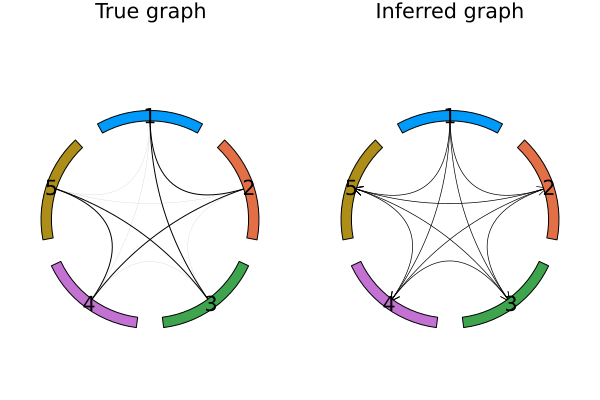

In [63]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij_new[1], edgewidth = abs.(Fij_new[1]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)

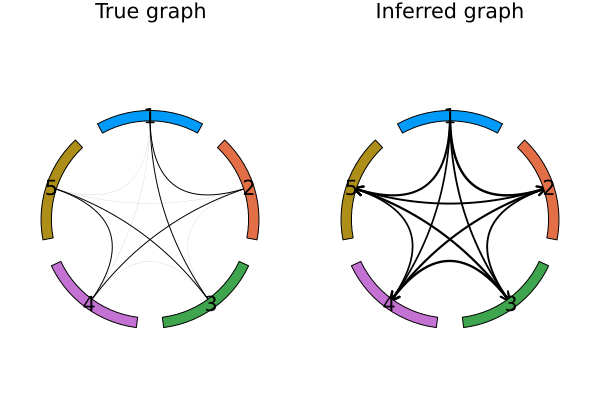

In [64]:
p3 = graphplot(Fij_new[2], edgewidth = abs.(Fij_new[2]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p3, aspect_ratio = 1)

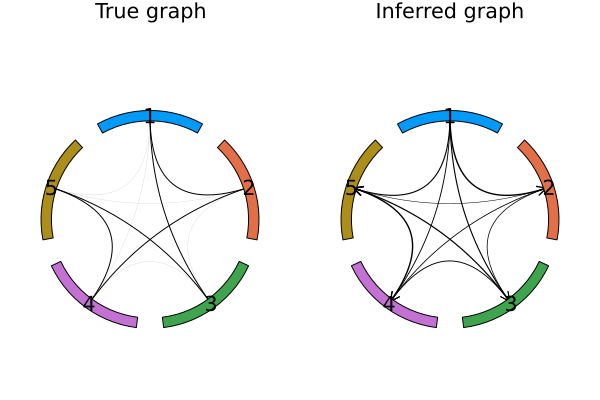

In [65]:
p4 = graphplot(Fij_new[3], edgewidth = abs.(Fij_new[3]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p4, aspect_ratio = 1)

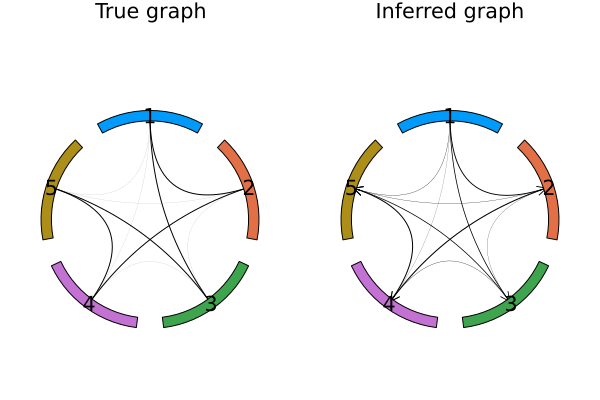

In [66]:
p5 = graphplot(Fij_new[4], edgewidth = abs.(Fij_new[4]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p5, aspect_ratio = 1)

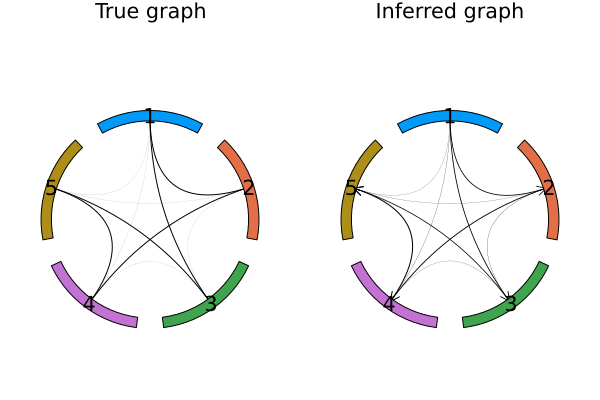

In [67]:
p6 = graphplot(Fij_new[5], edgewidth = abs.(Fij_new[5]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p6, aspect_ratio = 1)

By this comparison it becomes clear how much the number of observations is crucial in the inference process. Indeed we can see that while M is less than 500 observation it is almost impossible to detect the actual couplings, while if M is sufficiently large the Boltzamann machine allows us to spot them. It is also worth to note that for M greater than 1000 the inference process does not improve if M increases.  

One of the main problems of MCMC is that the samples are not independent. Therefore usually the collection of samples is done waiting a time interval $\Delta t$ that brings independece between samples. In order to quantify this correlation we estimate the autocorrelation function associated to the Markov chain that fetures the Bolzmann Machine. We recall that the autocorrelation function has the form:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu_t)(x^{(s)}-\mu_s)]}{\sqrt {\sigma_t^2\sigma_s^2}}
\end{align}
Because of the stationarity of the Markov chain we get:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu)(x^{(t+r)}-\mu)]}{\sigma^2}
\end{align} 
As seen in the lecture an unbiased Monte Carlo estimator of $\gamma$ is given by:
\begin{align}
\hat{\gamma}_n(r) = \frac{\frac{1}{n-r}\sum_{k=1}^{n-r}(\hat{x}^{(k)}-\hat{\mu}_n)(\hat{x}^{(k+r)}-\hat{\mu}_n)}{\frac{1}{n}\sum_{k=1}^{n}(\hat{x}^{(k)}-\hat{\mu}_n)^2}
\end{align}

In [19]:
using LinearAlgebra
function autocorrelation(x::Matrix{Float64}, R::Int64, N::Int64, M::Int64)
    μ = zeros(N)   
    for i in 1:N
        μ[i] = sum(x[:, i]) / M
    end

    #gamma_mt = Vector{Matrix{Float64}}(undef, R)
    gamma_mt = zeros(R, N, N)
    
    for r in 1:R
        for k in 1:(M-r+1)
            gamma_mt[r,:,:] += (x[k, :] - μ) * transpose(x[k+r-1, :] - μ) ./ (M - r + 1)
        end
        
        gamma_mt[r,:,:] * inv(gamma_mt[1,:,:])
    end

    return gamma_mt
end

autocorrelation (generic function with 1 method)

In [18]:
Xall[1,1,1,:] * transpose(Xall[1,1,1,:]) ./ 10

5×5 Matrix{Float64}:
 1.6  1.2  0.8  0.8  0.4
 1.2  0.9  0.6  0.6  0.3
 0.8  0.6  0.4  0.4  0.2
 0.8  0.6  0.4  0.4  0.2
 0.4  0.3  0.2  0.2  0.1

We well vary the couples $(M,T_{wait})$ with the following values:
- $M = (100,500,1000,1500,2000)$
- $T_{wait} = (1,50,100,250, 500)$

In [20]:
N = 5
q = 4
M = [1000,1500,2000]
Tw = [1,5,10,50,100,500]
Xall = zeros(length(M), length(Tw), M[length(M)], N)
Teq= 500

#xall = zeros(Int64, dmax, N)

for m in 1:length(M)
    for t in 1:length(Tw)

        x = sample(1:q, N, replace = true)

        for d in 1:Teq        
            x = metropolis_ising(x, J_True) 
        end

        for d in 1:M[m]     
            for d1 in 1:Tw[t]
                x = metropolis_ising(x, J_True)
            end
            #xall[d,:] = x
            Xall[m,t,d,:] = x
        end 
        
        #for i in 1:length(M), j in 1:length(Tw)
        #    Xall[m, j, i, :] =  xall[i, :]
        #end 
    end
end

In [13]:
size(Xall,4)

5

In [21]:
#R has to be choosen
R = 200

Autocorrelation = zeros(size(M, 1), size(Tw, 1), R, N, N)

for m in 1:length(M)
    for t in 1:length(Tw)
        Autocorrelation[m, t, :,:,:] = autocorrelation(Xall[m, t, :, :], R, N, M[m])
    end
end
Autocorrelation

3×6×200×5×5 Array{Float64, 5}:
[:, :, 1, 1, 1] =
 1.20796  1.24783  1.28374  1.30291  1.2434   1.2099
 1.194    1.194    1.29787  1.28686  1.30093  1.26231
 1.25888  1.19344  1.27973  1.2807   1.23044  1.28411

[:, :, 2, 1, 1] =
 0.969826  0.476531  0.174652  -0.0253985   -0.0319365   -0.0257038
 0.962809  0.413441  0.221519  -0.00289869   0.0580722    0.0688332
 1.01602   0.449204  0.208473  -0.0354214    0.00706425  -0.0464762

[:, :, 3, 1, 1] =
 0.791694  0.14056   0.0673462  -0.0347266   -0.0448489   0.029623
 0.798398  0.153204  0.0315953  -0.00570245  -0.0305515   0.0109252
 0.817449  0.133525  0.0165105  -0.00548078   0.00489684  0.0144138

;;; … 

[:, :, 198, 1, 1] =
  0.124787  -0.140825   -0.0271487   0.0602148  -0.00168543   0.00646862
 -0.117997   0.0335362  -0.0445751  -0.0284327   0.053392    -0.0301579
 -0.104533  -0.0287618   0.0234977   0.0130198  -0.0235904    0.0103243

[:, :, 199, 1, 1] =
  0.128955   -0.0964407  -0.0331056  0.027599   0.0278591   -0.0393564
 -0.116

In [22]:
using LinearAlgebra
norms=zeros(size(Autocorrelation,1),size(Autocorrelation,2),size(Autocorrelation,3))
for i in 1:size(norms,1)
    for j in 1:size(norms,2)
        for k in 1:size(norms,3)
            norms[i,j,k]=norm(Autocorrelation[i,j,k,:,:],1)
        end
    end
end

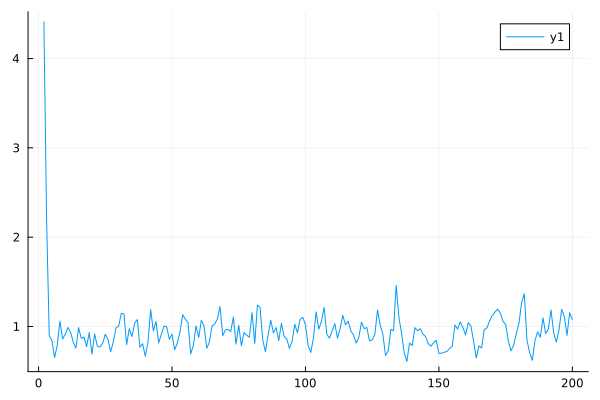

In [27]:
using Plots
rn=range(0,size(norms,1))
plot(collect(2:200), norms[1,2,2:200])

In [130]:
Autocorrelation[:,:,:,3]

5×5×200 Array{Float64, 3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

[:, :, 2] =
 0.829752  0.829752  0.829752  0.829752  0.829752
 0.874912  0.874912  0.874912  0.874912  0.874912
 0.847644  0.847644  0.847644  0.847644  0.847644
 0.848     0.848     0.848     0.848     0.848
 0.828392  0.828392  0.828392  0.828392  0.828392

[:, :, 3] =
 0.687671  0.687671  0.687671  0.687671  0.687671
 0.765365  0.765365  0.765365  0.765365  0.765365
 0.752556  0.752556  0.752556  0.752556  0.752556
 0.725556  0.725556  0.725556  0.725556  0.725556
 0.681002  0.681002  0.681002  0.681002  0.681002

;;; … 

[:, :, 198] =
 -0.0144161  -0.0144161  -0.0144161  -0.0144161  -0.0144161
 -0.149068   -0.149068   -0.149068   -0.149068   -0.149068
  0.068013    0.068013    0.068013    0.068013    0.068013
  0.0893957   0.0893957   0.0893957   0.0893957   0.0893957
  0.162122    0.162122    0.162122    0.162122    0.

Then if the autocorrelation inferred for $m\in M$ and $t\in T$ has to be displayed it is sufficient to run:

$$Autocorrelation[m, t, :, :]$$
